---
title: Lab 4 Coffee Lovers Unite
author: Sneha Narayanan
format:
    html:
        toc: true
        code-fold: true
embed-resources: true
theme: "Lumen"

---

# 1. Scrape the Location Counts

## 1.1 Starbucks

In [223]:
import requests
import pandas as pd
from bs4 import BeautifulSoup`

response = requests.get("https://worldpopulationreview.com/state-rankings/starbucks-stores-by-state")

In [224]:
soup = BeautifulSoup(response.content, "html.parser")

table = soup.find("table", attrs={"class": ['wpr-table']})

In [225]:
if table is None:
    print("Table not found")
else:
    rows = []

    for row in table.find_all("tr")[1:]:
        cells = row.find_all("td")

        if len(cells) >= 3:  
            State = row.find('th').get_text(strip=True)
            Starbucks_Stores_2023 = cells[0].get_text(strip=True)
            Starbucks_Stores_2021 = cells[1].get_text(strip=True)
            Starbucks_Stores_2024 = cells[2].get_text(strip=True)  

            rows.append({
                "State": State,
                "Starbucks Stores 2023": Starbucks_Stores_2023,
                "Starbucks Stores 2021": Starbucks_Stores_2021,
                "Starbucks Stores 2024": Starbucks_Stores_2024
            })

    df = pd.DataFrame(rows)
    print(df)  

                   State Starbucks Stores 2023 Starbucks Stores 2021 Starbucks Stores 2024
0             California                 3,080                 2,959                 3,117
1                  Texas                 1,346                 1,215                 1,409
2                Florida                   844                   786                   892
3             Washington                   741                   739                   736
4               New York                   692                   643                   715
5               Illinois                   677                   621                   685
6                Arizona                   548                   535                   579
7               Colorado                   495                   497                   506
8                   Ohio                   491                   446                   499
9               Virginia                   489                   456                   510

In [226]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', 1000)  

df.head()

,State,Starbucks Stores 2023,Starbucks Stores 2021,Starbucks Stores 2024
0,California,"3,080","2,959","3,117"
1,Texas,"1,346","1,215","1,409"
2,Florida,844,786,892
3,Washington,741,739,736
4,New York,692,643,715


In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   State                  51 non-null     object
 1   Starbucks Stores 2023  51 non-null     object
 2   Starbucks Stores 2021  51 non-null     object
 3   Starbucks Stores 2024  51 non-null     object
dtypes: object(4)
memory usage: 1.7+ KB


In [228]:
df[['Starbucks Stores 2021', 'Starbucks Stores 2023', 'Starbucks Stores 2024']] = df[['Starbucks Stores 2021', 'Starbucks Stores 2023', 'Starbucks Stores 2024']].replace(',', '', regex=True).apply(pd.to_numeric)

In [229]:
tidy_starb = df.melt(id_vars=["State"], 
                          value_vars=["Starbucks Stores 2021", "Starbucks Stores 2023", "Starbucks Stores 2024"], 
                          var_name="Year", 
                          value_name="Starbucks Stores")

tidy_starb['Year'] = tidy_starb['Year'].str.replace('Starbucks Stores ', '').astype(int)

tidy_starb.head()

,State,Year,Starbucks Stores
0,California,2021,2959.0
1,Texas,2021,1215.0
2,Florida,2021,786.0
3,Washington,2021,739.0
4,New York,2021,643.0


In [230]:
tidy_starb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             153 non-null    object 
 1   Year              153 non-null    int64  
 2   Starbucks Stores  111 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.7+ KB


In [242]:
tidy_starb_2023 = tidy_starb[tidy_starb['Year'] == 2023]

In [243]:
tidy_starb_2023.head(10)

,State,Year,Starbucks Stores
51,California,2023,3080.0
52,Texas,2023,1346.0
53,Florida,2023,844.0
54,Washington,2023,741.0
55,New York,2023,692.0
56,Illinois,2023,677.0
57,Arizona,2023,548.0
58,Colorado,2023,495.0
59,Ohio,2023,491.0
60,Virginia,2023,489.0


In [244]:
tidy_starb_2023.isnull().sum()

State               0
Year                0
Starbucks Stores    0
dtype: int64

## 1.2 Dunkin’ Donuts

In [192]:
response = requests.get("https://worldpopulationreview.com/state-rankings/dunkin-donuts-by-state")

In [193]:
soup = BeautifulSoup(response.content, "html.parser")

table = soup.find("table", attrs={"class": "wpr-table"})

In [194]:
tables = soup.find_all("table")
for i, table in enumerate(tables):
    print(f"Table {i} attributes:", table.attrs)

Table 0 attributes: {'class': ['wpr-table']}


In [195]:
if table is None:
    print("Table not found")
else:
    rows = []

    for row in table.find_all("tr")[1:]:  # Skip header
        cells = row.find_all("td")
        if len(cells) == 2:  
            state = row.find('th').get_text(strip=True)  # Use 'state' instead of 'State'
            locations_2024 = cells[0].get_text(strip=True)
            locations_2023 = cells[1].get_text(strip=True)

            rows.append({
                "State": state,  
                "Dunkin Locations 2024": locations_2024,
                "Dunkin Locations 2023": locations_2023,
            })

    df = pd.DataFrame(rows)
    print("DataFrame created successfully. Here are the first few rows:")
    print(df)  
    
    for column in ['Dunkin Locations 2024', 'Dunkin Locations 2023']:
        df[column] = df[column].str.replace(',', '').replace('', '0').astype(int)

    total_2024 = df['Dunkin Locations 2024'].sum()
    total_2023 = df['Dunkin Locations 2023'].sum()
    print(f"Total Dunkin' Locations in 2024: {total_2024}")
    print(f"Total Dunkin' Locations in 2023: {total_2023}")

DataFrame created successfully. Here are the first few rows:
                   State Dunkin Locations 2024 Dunkin Locations 2023
0               New York                 1,431                 1,414
1          Massachusetts                 1,042                 1,068
2                Florida                   909                   883
3             New Jersey                   872                   866
4               Illinois                   711                   692
5           Pennsylvania                   650                   629
6            Connecticut                   476                   480
7               Maryland                   311                   303
8                Georgia                   287                   265
9                   Ohio                   261                   245
10              Virginia                   244                   230
11                 Texas                   226                   196
12        North Carolina                  

In [196]:
df.head()

,State,Dunkin Locations 2024,Dunkin Locations 2023
0,New York,1431,1414
1,Massachusetts,1042,1068
2,Florida,909,883
3,New Jersey,872,866
4,Illinois,711,692


In [197]:
tidy_dunkin = df.melt(id_vars=["State"], 
                  value_vars=["Dunkin Locations 2023", "Dunkin Locations 2024"], 
                  var_name="Year", 
                  value_name="Dunkin Locations")


tidy_dunkin['Year'] = tidy_dunkin['Year'].str.replace('Dunkin Locations ', '').astype(int)

tidy_dunkin.head()

,State,Year,Dunkin Locations
0,New York,2023,1414
1,Massachusetts,2023,1068
2,Florida,2023,883
3,New Jersey,2023,866
4,Illinois,2023,692


In [245]:
tidy_dunkin_2023 = tidy_dunkin[tidy_dunkin['Year'] == 2023]

In [246]:
tidy_dunkin_2023.head(10)

,State,Year,Dunkin Locations
0,New York,2023,1414
1,Massachusetts,2023,1068
2,Florida,2023,883
3,New Jersey,2023,866
4,Illinois,2023,692
5,Pennsylvania,2023,629
6,Connecticut,2023,480
7,Maryland,2023,303
8,Georgia,2023,265
9,Ohio,2023,245


In [247]:
tidy_dunkin_2023.isnull().sum()

State               0
Year                0
Dunkin Locations    0
dtype: int64

# 2. Supplemental Data

In [198]:
url = "https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population"
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

In [199]:
table = soup.find("table")

In [200]:
table = soup.find("table", class_="wikitable")

In [201]:
if table is None:
    print("Table not found")
else:
    state_data = []

    for row in table.find_all("tr")[1:]:  
        cells = row.find_all("td")
        
        if len(cells) >= 3:
            state = cells[0].get_text(strip=True) 
            population = cells[1].get_text(strip=True).replace(',', '')  
                state_data.append({
                    "State": state,
                    "Population": int(population)

    population_df = pd.DataFrame(state_data)
    print(population_df.head())

Skipping non-numeric population for state: —
Skipping non-numeric population for state: —
Skipping non-numeric population for state: —
Skipping non-numeric population for state: —
  State  Population
0     1           1
1     2           2
2     3           4
3     4           3
4     5           6


In [202]:
table = soup.find("table", class_="wikitable sortable")

In [203]:
if table is None:
    print("Table not found")
else:
    state_data = []

    for row in table.find_all("tr")[1:]:  
        cells = row.find_all("td")
        
        if len(cells) >= 4:
            
            state = cells[2].get_text(strip=True)  
            population = cells[3].get_text(strip=True).replace(',', '')  

            if population.isdigit():
                state_data.append({
                    "State": state,
                    "Population": int(population)
                })
            else:
                print(f"Skipping non-numeric population for state: {state}")


    population_df = pd.DataFrame(state_data)
    print(population_df.head(10))

            State  Population
0      California    39538223
1           Texas    30145505
2         Florida    21538187
3        New York    20201249
4    Pennsylvania    13002700
5        Illinois    12812508
6            Ohio    11799448
7         Georgia    10711908
8  North Carolina    10439388
9        Michigan    10077331


In [204]:
population_df

,State,Population
0,California,39538223
1,Texas,30145505
2,Florida,21538187
3,New York,20201249
4,Pennsylvania,13002700
5,Illinois,12812508
6,Ohio,11799448
7,Georgia,10711908
8,North Carolina,10439388
9,Michigan,10077331


### 2.1 Merging the datasets

In [276]:
merged_df = pd.merge(tidy_dunkin_2023, tidy_starb_2023, on="State", how="outer")
merged_df = pd.merge(merged_df, population_df, on="State", how="outer")

In [ ]:
merged_df = pd.merge(tidy_dunkin, tidy_starb, on="State", how="outer")
merged_df = pd.merge(merged_df, population_df, on="State", how="outer")

In [277]:
merged_df

,State,Year_x,Dunkin Locations,Year_y,Starbucks Stores,Population
0,Alabama,2023.0,59.0,2023.0,85.0,5024279
1,Alaska,2023.0,0.0,2023.0,49.0,733391
2,American Samoa,NaN,NaN,NaN,NaN,49710
3,Arizona,2023.0,102.0,2023.0,548.0,7151502
4,Arkansas,2023.0,9.0,2023.0,55.0,3011524
5,California,2023.0,134.0,2023.0,3080.0,39538223
6,Colorado,2023.0,43.0,2023.0,495.0,5773714
7,Connecticut,2023.0,480.0,2023.0,123.0,3605944
8,Contiguous United States,NaN,NaN,NaN,NaN,329260619
9,Delaware,2023.0,66.0,2023.0,25.0,989948


In [278]:
merged_df.isnull().sum()

State               0
Year_x              9
Dunkin Locations    9
Year_y              9
Starbucks Stores    9
Population          0
dtype: int64

In [279]:
df_merged=merged_df.dropna()

In [280]:
df_merged.isnull().sum()

State               0
Year_x              0
Dunkin Locations    0
Year_y              0
Starbucks Stores    0
Population          0
dtype: int64

### 2.2 Revenue

In [356]:
financial_data = pd.DataFrame({
    "Company": ["Dunkin'", "Starbucks"],
    "Revenue": [1.37, 36.78]})

In [357]:
big_df = df_merged.merge(financial_data, how="cross")

In [358]:
big_df

,State,Year_x,Dunkin Locations,Year_y,Starbucks Stores,Population,Company,Revenue
0,Alabama,2023.0,59.0,2023.0,85.0,5024279,Dunkin',1.37
1,Alabama,2023.0,59.0,2023.0,85.0,5024279,Starbucks,36.78
2,Alaska,2023.0,0.0,2023.0,49.0,733391,Dunkin',1.37
3,Alaska,2023.0,0.0,2023.0,49.0,733391,Starbucks,36.78
4,Arizona,2023.0,102.0,2023.0,548.0,7151502,Dunkin',1.37
...,...,...,...,...,...,...,...,...
97,West Virginia,2023.0,27.0,2023.0,25.0,1793716,Starbucks,36.78
98,Wisconsin,2023.0,83.0,2023.0,145.0,5893718,Dunkin',1.37
99,Wisconsin,2023.0,83.0,2023.0,145.0,5893718,Starbucks,36.78
100,Wyoming,2023.0,1.0,2023.0,23.0,576851,Dunkin',1.37


In [359]:
big_df.isnull().sum()

State               0
Year_x              0
Dunkin Locations    0
Year_y              0
Starbucks Stores    0
Population          0
Company             0
Revenue             0
dtype: int64

In [360]:
census_regions = {
    "Northeast": {
        "New England": ["Connecticut", "Maine", "Massachusetts", "New Hampshire", "Rhode Island", "Vermont"],
        "Middle Atlantic": ["New Jersey", "New York", "Pennsylvania"]
    },
    "Midwest": {
        "East North Central": ["Illinois", "Indiana", "Michigan", "Ohio", "Wisconsin"],
        "West North Central": ["Iowa", "Kansas", "Minnesota", "Missouri", "Nebraska", "North Dakota", "South Dakota"]
    },
    "South": {
        "South Atlantic": ["Delaware", "Florida", "Georgia", "Maryland", "North Carolina", "South Carolina", "Virginia", "Washington, D.C.", "West Virginia"],
        "East South Central": ["Alabama", "Kentucky", "Mississippi", "Tennessee"],
        "West South Central": ["Arkansas", "Louisiana", "Oklahoma", "Texas"]
    },
    "West": {
        "Mountain": ["Arizona", "Colorado", "Idaho", "Montana", "Nevada", "New Mexico", "Utah", "Wyoming"],
        "Pacific": ["Alaska", "California", "Hawaii", "Oregon", "Washington"]
    }
}

def assign_region(state):
    for region, divisions in census_regions.items():
        for states in divisions.values():
            if state in states:
                return region
    return None 

big_df["Region"] = big_df["State"].apply(assign_region)

In [361]:
big_df

,State,Year_x,Dunkin Locations,Year_y,Starbucks Stores,Population,Company,Revenue,Region
0,Alabama,2023.0,59.0,2023.0,85.0,5024279,Dunkin',1.37,South
1,Alabama,2023.0,59.0,2023.0,85.0,5024279,Starbucks,36.78,South
2,Alaska,2023.0,0.0,2023.0,49.0,733391,Dunkin',1.37,West
3,Alaska,2023.0,0.0,2023.0,49.0,733391,Starbucks,36.78,West
4,Arizona,2023.0,102.0,2023.0,548.0,7151502,Dunkin',1.37,West
...,...,...,...,...,...,...,...,...,...
97,West Virginia,2023.0,27.0,2023.0,25.0,1793716,Starbucks,36.78,South
98,Wisconsin,2023.0,83.0,2023.0,145.0,5893718,Dunkin',1.37,Midwest
99,Wisconsin,2023.0,83.0,2023.0,145.0,5893718,Starbucks,36.78,Midwest
100,Wyoming,2023.0,1.0,2023.0,23.0,576851,Dunkin',1.37,West


In [362]:
big_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             102 non-null    object 
 1   Year_x            102 non-null    float64
 2   Dunkin Locations  102 non-null    float64
 3   Year_y            102 non-null    float64
 4   Starbucks Stores  102 non-null    float64
 5   Population        102 non-null    int64  
 6   Company           102 non-null    object 
 7   Revenue           102 non-null    float64
 8   Region            100 non-null    object 
dtypes: float64(5), int64(1), object(3)
memory usage: 7.3+ KB


# 3. ANALYSE

### 3.1 Are some of these chains more prevalent in certain states than others? Possibly despite having less stores overall? Same questions for regions instead of states.

In [335]:
import pandas as pd
from plotnine import ggplot, aes, geom_bar, labs, theme_minimal, theme, element_text

In [363]:
melted_df = big_df.melt(id_vars=['State', 'Region'], value_vars=['Dunkin Locations', 'Starbucks Stores'],
                        var_name='Company', value_name='num_stores')

melted_df['Company'] = melted_df['Company'].str.replace(' Locations| Stores', '', regex=True)

In [333]:
state_company_data = melted_df.groupby(['State', 'Company'], as_index=False)['num_stores'].mean()

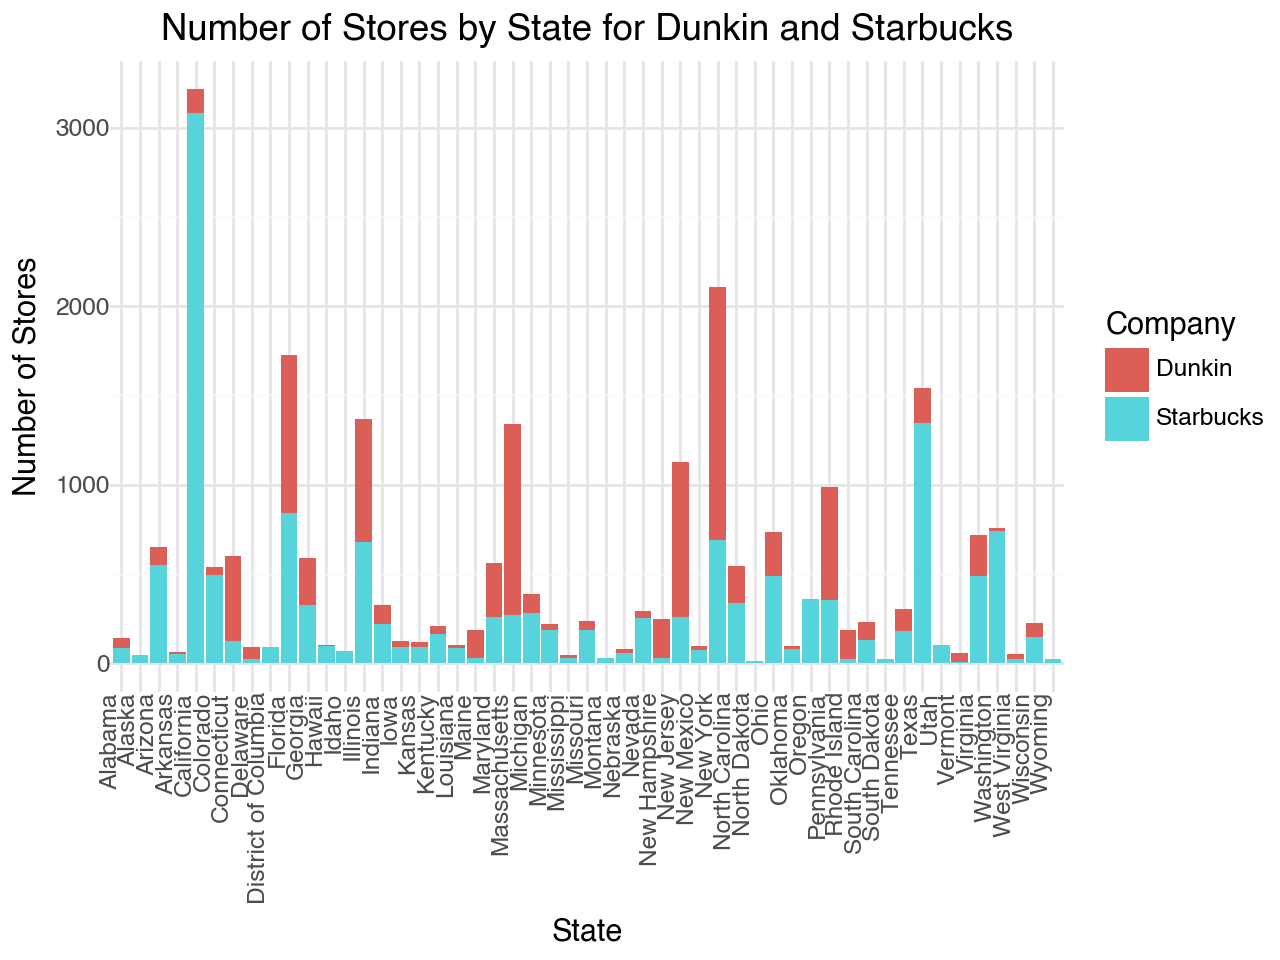

In [336]:
(ggplot(state_company_data, aes(x='State', y='num_stores', fill='Company')) +
 geom_bar(stat='identity', position='stack') +
 labs(title='Number of Stores by State for Dunkin and Starbucks',
      x='State',
      y='Number of Stores') +
 theme_minimal() +
 theme(axis_text_x=element_text(rotation=90, hjust=1)))

>### Both chains exhibit significant prevalence across nearly every state, with clear dominance of one brand over the other. For instance, Starbucks leads in states like California, while Dunkin' Donuts is more prominent in New york. Additionally, there are some states, such as Florida and Illinois, where both brands maintain a strong presence, resulting in a more balanced distribution of stores.

In [338]:
region_company_data = melted_df.groupby(['Region', 'Company'], as_index=False)['num_stores'].mean()

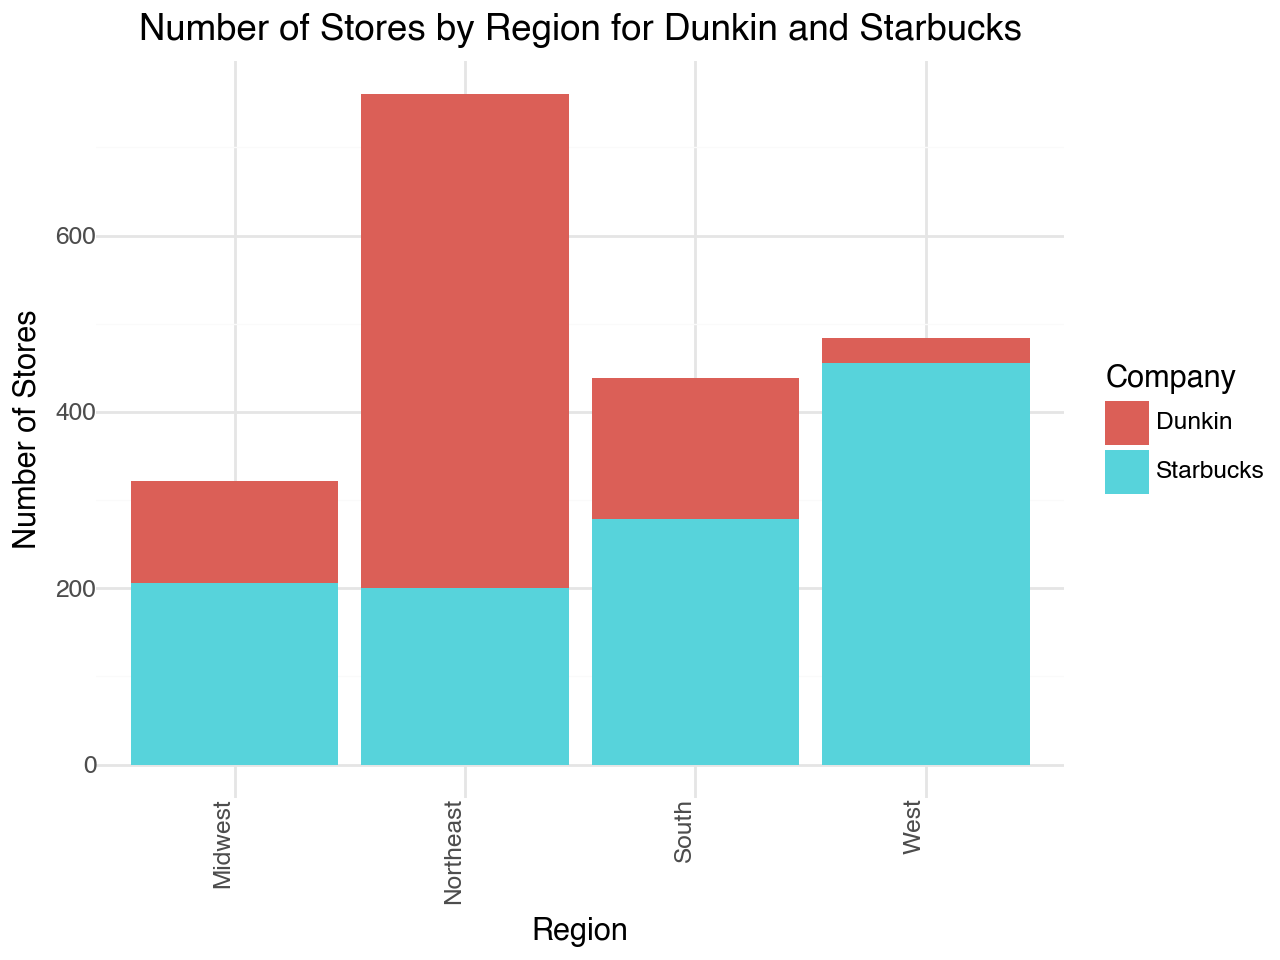

In [339]:
(ggplot(region_company_data, aes(x='Region', y='num_stores', fill='Company')) +
 geom_bar(stat='identity', position='stack') +
 labs(title='Number of Stores by Region for Dunkin and Starbucks',
      x='Region',
      y='Number of Stores') +
 theme_minimal() +
 theme(axis_text_x=element_text(rotation=90, hjust=1)))

### In regional comparisons, Starbucks appears to dominate in nearly every area except for the Northeast, where its presence is less pronounced.

### 3.2 How does your chosen financial metric change by state and region for each chain? For example, having 5 stores in California is very different from having 5 stores in Wyoming.

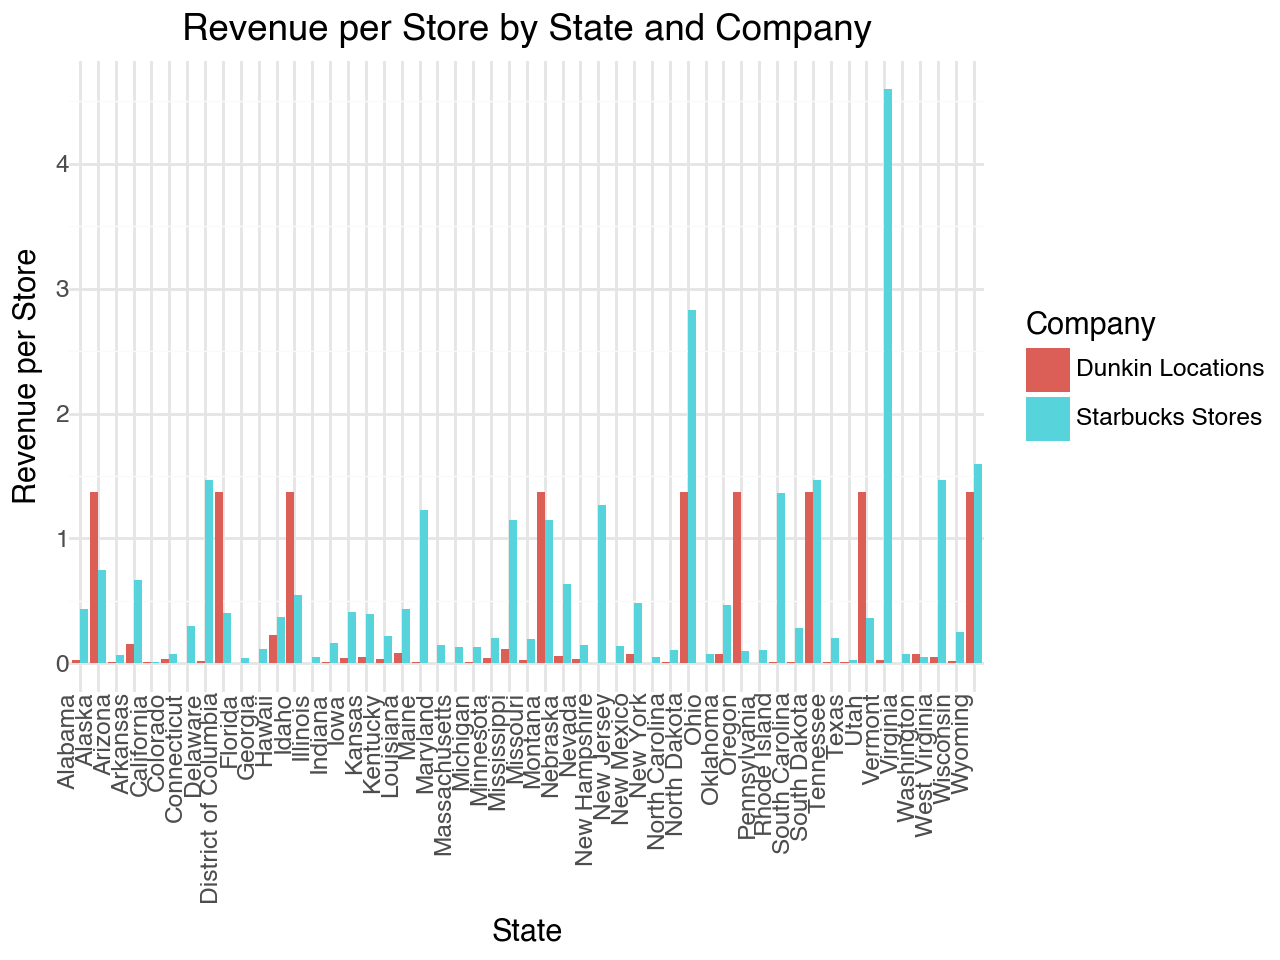

In [389]:
melted_df = big_df.melt(id_vars=['State', 'Region', 'Population'], 
                         value_vars=['Dunkin Locations', 'Starbucks Stores'],
                         var_name='Company', value_name='num_stores')

melted_df['Revenue'] = melted_df.apply(
    lambda row: big_df.loc[(big_df['State'] == row['State']) & 
                           (big_df['Company'].str.contains(row['Company'].split()[0])),
                           'Revenue'].values[0],
    axis=1
)

melted_df['Revenue_per_Store'] = melted_df['Revenue'] / melted_df['num_stores'].replace(0, 1)  # Avoid division by zero

plot = (ggplot(melted_df, aes(x='State', y='Revenue_per_Store', fill='Company')) +
        geom_bar(stat='identity', position='dodge') +
        labs(title='Revenue per Store by State and Company',
             x='State',
             y='Revenue per Store') +
        theme_minimal() +
        theme(axis_text_x=element_text(rotation=90, hjust=1)))

plot.show()

Revenue per store is high in states where the stores are high. Example Virginia and Ohio has high revenue as they have more number of starbucks stores.

### 3.3 How does the number of Dunkin' locations correlate with the population across different states?

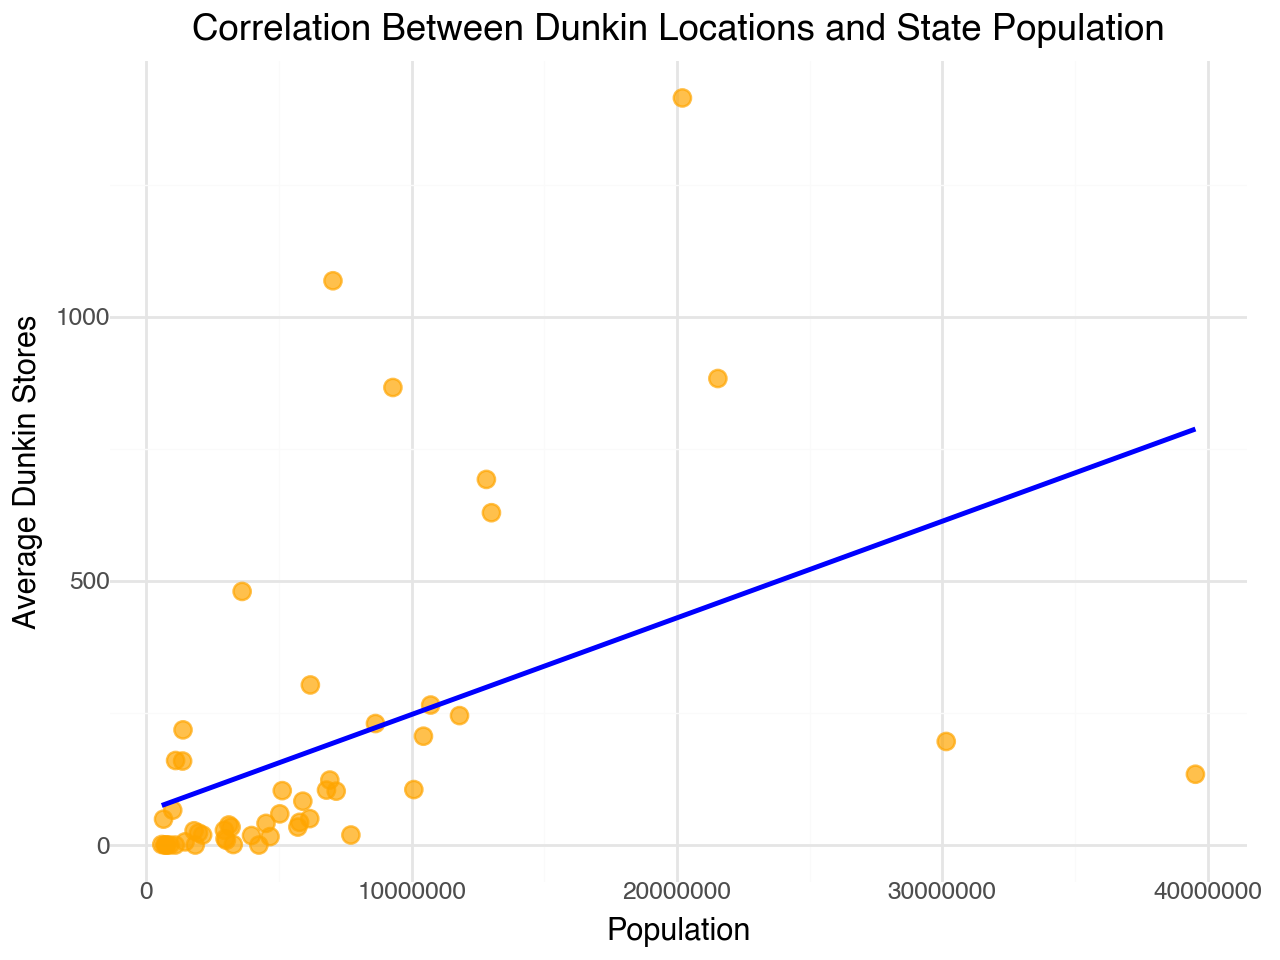

In [403]:
import pandas as pd
from plotnine import *

dunkin_population_data = big_df.groupby('State').agg(
    Dunkin_Stores=('Dunkin Locations', 'mean'),
    Population=('Population', 'mean')
).reset_index()

p_dunkin_population = (ggplot(dunkin_population_data, aes(x='Population', y='Dunkin_Stores'))
                       + geom_point(color='orange', size=3, alpha=0.7)
                       + geom_smooth(method='lm', color='blue', se=False)
                       + labs(title='Correlation Between Dunkin Locations and State Population',
                              x='Population', y='Average Dunkin Stores')
                       + theme_minimal()
)

p_dunkin_population.show()

>Positive Correlation: The plot shows that states with larger populations tend to have more Dunkin' stores.

>There are a few states that deviate significantly from the trend line, suggesting that other factors besides population might influence the number of Dunkin' locations in those states.

### 3.4 What is the revenue distribution among Dunkin' and Starbucks across different states?

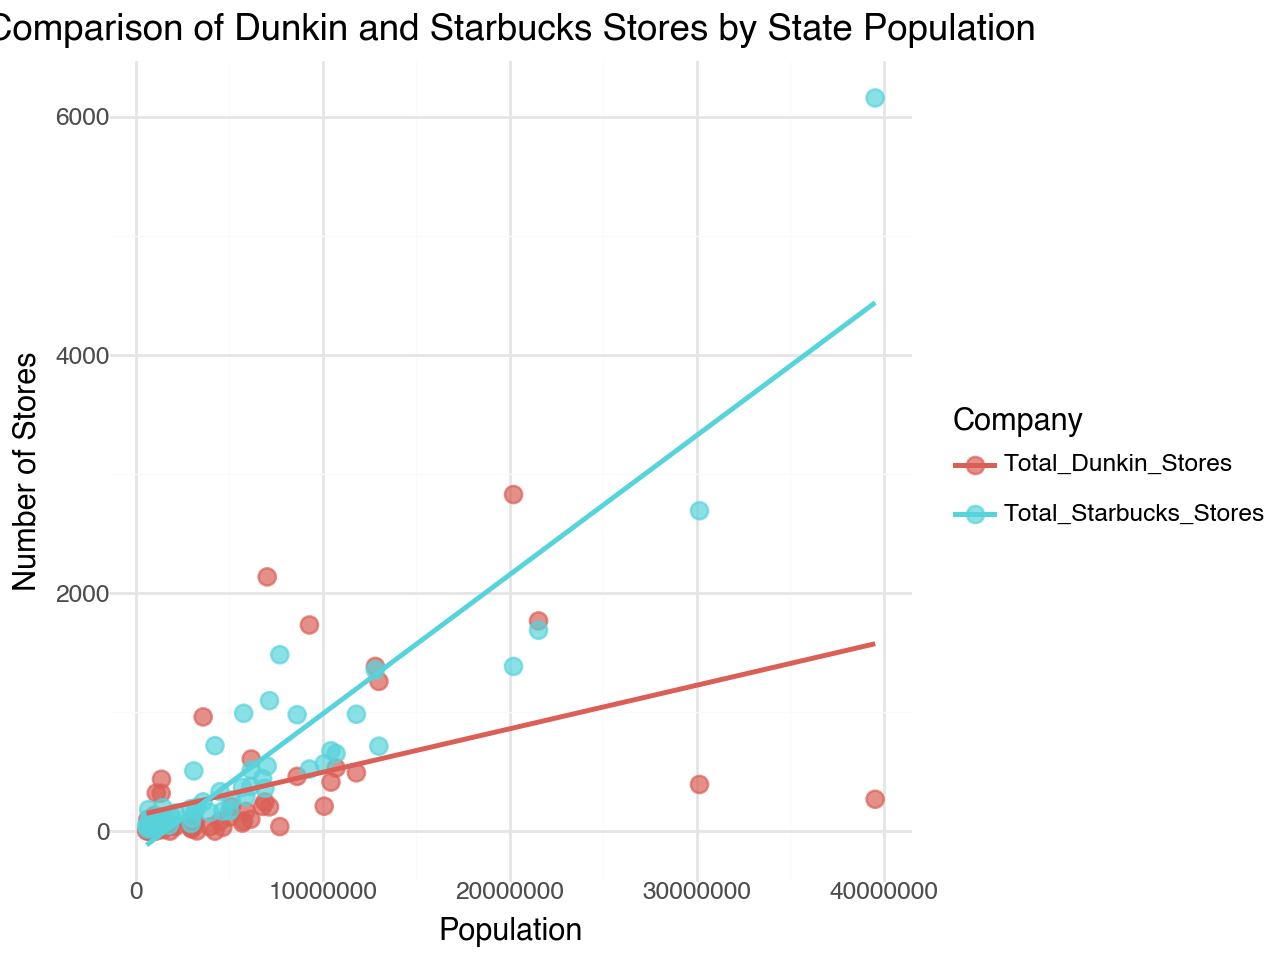

In [405]:
state_comparison_data = big_df.groupby('State').agg(
    Total_Dunkin_Stores=('Dunkin Locations', 'sum'),
    Total_Starbucks_Stores=('Starbucks Stores', 'sum'),
    Population=('Population', 'mean')
).reset_index()

state_comparison_melted = state_comparison_data.melt(id_vars=['State', 'Population'], 
                                                      value_vars=['Total_Dunkin_Stores', 'Total_Starbucks_Stores'],
                                                      var_name='Company', 
                                                      value_name='Store_Count')

p_comparison = (ggplot(state_comparison_melted, aes(x='Population', y='Store_Count', color='Company'))
                + geom_point(size=3, alpha=0.7)
                + geom_smooth(method='lm', se=False)
                + labs(title='Comparison of Dunkin and Starbucks Stores by State Population',
                       x='Population', y='Number of Stores')
                + theme_minimal()
)

p_comparison.show()

> Dunkin': The trend line for Dunkin' is steeper than Starbucks', suggesting that Dunkin' tends to have a higher concentration of stores in more populous states.

>Starbucks: Starbucks, on the other hand, seems to have a more consistent presence across states of varying populations.

# 4. Automate

In [328]:
def scrape_store_data(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    table = soup.find("table", attrs={"class": "wpr-table"})

    if table is None:
        print("Table not found")
        return None

    rows = []
    company_name = url.split('/')[-1].replace('-by-state', '').replace('-', ' ').title()

    for row in table.find_all("tr")[1:]:  # Skip the header
        cells = row.find_all("td")
        if len(cells) > 0:  
            state = row.find('th').get_text(strip=True)
            locations = [cell.get_text(strip=True) for cell in cells]

            row_data = {'State': state}

            for i, loc in enumerate(locations):
                loc_cleaned = loc.replace(',', '').strip()  
                try:
                    row_data[f"{company_name} Locations {2024 - i}"] = int(loc_cleaned)
                except ValueError:
                    row_data[f"{company_name} Locations {2024 - i}"] = 0  # Default to 0 if conversion fails

            rows.append(row_data)

    df = pd.DataFrame(rows)
    return df

In [329]:
krispy_kreme_data = scrape_store_data("https://worldpopulationreview.com/state-rankings/krispy-kreme-by-state")

krispy_kreme_data.head()

,State,Krispy Kreme Locations 2024
0,California,40
1,Florida,32
2,Georgia,30
3,North Carolina,27
4,Texas,24


In [402]:
starbucks_url = "https://worldpopulationreview.com/state-rankings/starbucks-stores-by-state"

starbucks_data = scrape_store_data(starbucks_url)

starbucks_data.head()

,State,Starbucks Stores Locations 2024,Starbucks Stores Locations 2023,Starbucks Stores Locations 2022
0,California,3080,2959,3117
1,Texas,1346,1215,1409
2,Florida,844,786,892
3,Washington,741,739,736
4,New York,692,643,715
